## cellphone reviews at ...
## data at http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz


In [0]:
import json
import pandas as pd
import numpy as np
import gzip
import pickle

PROCESSED_FILENAME= './data/amazon_reviews_processed_partA.pickle' 



In [ ]:
def readFromDisk():
    with open(PROCESSED_FILENAME, "rb") as f:
        dfread = pickle.load(f)
        return dfread
       
        

In [ ]:
#nltk.download('all', halt_on_error = True)

df=readFromDisk()


In [4]:
#Pratik: Google Colab: Pulling the dataset from Google Drive
#from google.colab import drive
#drive.mount('/content/gdrive')
#dfraw = getDF('gdrive/My Drive/Machine_Learning/cell_reviews_5core.json.gz')

#Code to read the dataset from a local folder
#dfraw = getDF('./data/cell_reviews_5core.json.gz')
#metadfraw = getDF('./data/cell_reviews_meta.json.gz')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
# take a peek at the data
df.head()



,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,Review_Time,Month,Year
0,5.0,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,2014-08-04,8,2014
1,5.0,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,2014-02-12,2,2014
7,5.0,True,"01 17, 2014",A31OVFL91BCKXG,7508492919,NaN,Ashley Nicole Miller,It is a very cute case. None of the jewels hav...,Cute case,1389916800,NaN,NaN,2014-01-17,1,2014
11,5.0,True,"10 23, 2013",A2ZB7KGUSBR9P3,7508492919,NaN,E. Bryce,Another great product that my daughter she use...,Bling bling for iPhone 4S,1382486400,NaN,NaN,2013-10-23,10,2013
14,5.0,True,"09 10, 2013",A18U23JWTMQX5C,7508492919,NaN,KaitlynxO625,Beautiful quality and outstanding product! Eve...,I can't stop using this case!,1378771200,NaN,NaN,2013-09-10,9,2013


In [8]:
# take a peek at the data
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 52074
Data columns (total 15 columns):
overall           25000 non-null float64
verified          25000 non-null bool
reviewTime        25000 non-null object
reviewerID        25000 non-null object
asin              25000 non-null object
style             7265 non-null object
reviewerName      24996 non-null object
reviewText        24999 non-null object
summary           24997 non-null object
unixReviewTime    25000 non-null int64
vote              3910 non-null object
image             181 non-null object
Review_Time       25000 non-null datetime64[ns]
Month             25000 non-null int64
Year              25000 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 2.9+ MB


In [9]:
#count of reviews each year
yearly=df.groupby(['Year'])['reviewerID'].count().reset_index()
#change name of column
yearly=yearly.rename(columns={'reviewerID': 'Number_Of_Reviews'})
yearly

,Year,Number_Of_Reviews
0,2002,2
1,2003,16
2,2004,41
3,2005,127
4,2006,309
5,2007,654
6,2008,1453
7,2009,1665
8,2010,1719
9,2011,2423


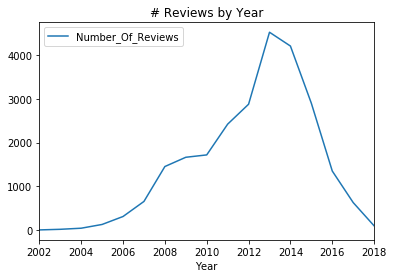

In [10]:
#plot number of reviews by year
yearly.plot(x="Year",y="Number_Of_Reviews",kind="line",title="# Reviews by Year")

import matplotlib.pyplot as plt
plt.show()



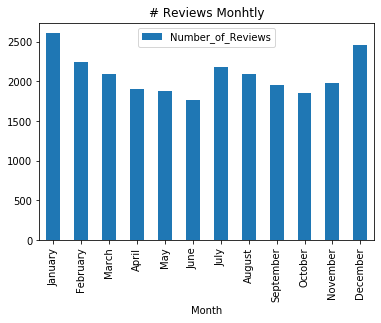

In [11]:
#number of reviews by month
monthly=df.groupby(['Month'])['reviewerID'].count().reset_index()
# Replacing digits of 'Month' column in 'Monthly' dataframe with words using 'Calendar' library

import calendar
monthly['Month'] = monthly['Month'].apply(lambda x: calendar.month_name[x])
monthly=monthly.rename(columns={'reviewerID':'Number_of_Reviews'})
monthly
#barplot
monthly.plot(x="Month",y="Number_of_Reviews",kind="bar",title="# Reviews Monhtly")
plt.show()


In [12]:
#AVERAGE OVERALL RATINGS OVER THE YEARS (1999-2014)

Yearly_Avg_Rating=df.groupby(['Year'])['overall'].mean().reset_index()
Yearly_Avg_Rating['Moving_Average']=Yearly_Avg_Rating['overall'].rolling(window=3).mean()
Yearly_Avg_Rating.head()



,Year,overall,Moving_Average
0,2002,4.500000,NaN
1,2003,3.812500,NaN
2,2004,3.682927,3.998476
3,2005,3.440945,3.645457
4,2006,3.540453,3.554775


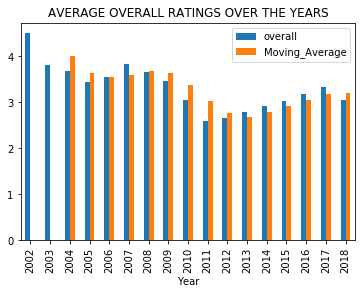

In [13]:
#Plot Bar Chart Plot for average overall ratings over the years
Yearly_Avg_Rating.plot(x="Year",y=["overall","Moving_Average"],kind="bar",title="AVERAGE OVERALL RATINGS OVER THE YEARS")
plt.show()

In [14]:
#DISTRIBUTUTION OF LENGTH OF REVIEWS ON AMAZON
Review_Length=df[['reviewerID','reviewText']].fillna("")
# Word count
Review_Length['Word_Length']=Review_Length['reviewText'].apply(lambda x: len(x.split()))
# character count
Review_Length['Character_Length']=Review_Length['reviewText'].apply(lambda x: len(x))
Review_Length.head()

,reviewerID,reviewerName,reviewText,Word_Length,Character_Length
0,A24E3SXTC62LJI,Claudia Valdivia,Looks even better in person. Be careful to not...,49,271
1,A269FLZCB4GIPV,sarah ponce,When you don't want to spend a whole lot of ca...,22,102
7,A31OVFL91BCKXG,Ashley Nicole Miller,It is a very cute case. None of the jewels hav...,71,327
11,A2ZB7KGUSBR9P3,E. Bryce,Another great product that my daughter she use...,25,128
14,A18U23JWTMQX5C,KaitlynxO625,Beautiful quality and outstanding product! Eve...,23,133


In [15]:
Char_Review_Length=Review_Length.groupby(pd.cut(Review_Length.Character_Length,np.arange(0, 1501, 100))).count()
Char_Review_Length=Char_Review_Length.rename(columns={'Character_Length':'Count'})
result_Char_Review_Length=Char_Review_Length.reset_index()

Word_Review_Length=Review_Length.groupby(pd.cut(Review_Length.Word_Length,np.arange(0, 801, 100))).count()
Word_Review_Length=Word_Review_Length.rename(columns={'Word_Length':'Count'})
result_Word_Review_Length=Word_Review_Length.reset_index()

result_Char_Review_Length[["Character_Length","Count"]].head()

,Character_Length,Count
0,"(0, 100]",5315
1,"(100, 200]",6332
2,"(200, 300]",3246
3,"(300, 400]",2163
4,"(400, 500]",1528


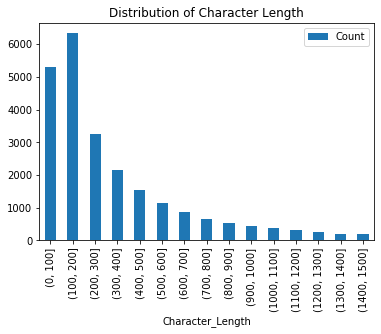

In [16]:
#Bar Plot for distribution of Length of reviews on Amazon
result_Char_Review_Length.plot(x="Character_Length",y="Count",kind="bar",title="Distribution of Character Length")
plt.show()

In [17]:
result_Word_Review_Length[["Word_Length","Count"]].head()

,Word_Length,Count
0,"(0, 100]",19000
1,"(100, 200]",3468
2,"(200, 300]",1269
3,"(300, 400]",507
4,"(400, 500]",308


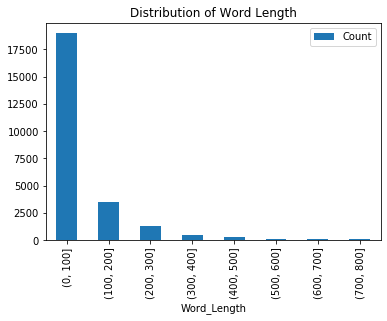

In [18]:
#Bar Plot for distribution of Length of reviews on Amazon
result_Word_Review_Length.plot(x="Word_Length",y="Count",kind="bar",title="Distribution of Word Length")
plt.show()

In [19]:
#DISTRIBUTION OF NUMBER OF REVIEWS WRITTEN BY EACH USER
User_Review=df[['reviewerID','asin']]
User_Review2=User_Review.groupby(['reviewerID']).count().reset_index()
User_Review3=User_Review2.sort_values('asin',ascending=False)
User_Review3=User_Review3.rename(columns={'asin':'No_of_Reviews'})
User_Review4=User_Review3.groupby('No_of_Reviews')['reviewerID'].count().reset_index()
User_Review4=User_Review4.rename(columns={'reviewerID':'Count'})
User_Review4=User_Review4.groupby(pd.cut(User_Review4.No_of_Reviews,np.arange(0, 200, 10))).sum()
User_Review4=User_Review4.rename(columns={'No_of_Reviews':'x'})
User_Review4=User_Review4.reset_index()
User_Review4[['No_of_Reviews','Count']].head()

,No_of_Reviews,Count
0,"(0, 10]",17971
1,"(10, 20]",7
2,"(20, 30]",0
3,"(30, 40]",0
4,"(40, 50]",0


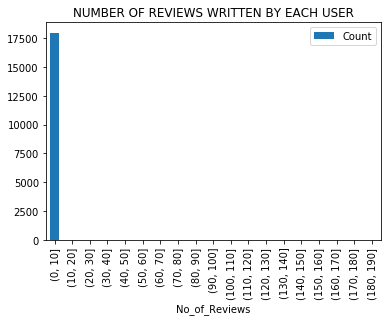

In [20]:
#Bar Chart Plot for NUMBER OF REVIEWS WRITTEN BY EACH USER
User_Review4.plot(x="No_of_Reviews",y="Count",kind="bar",title="NUMBER OF REVIEWS WRITTEN BY EACH USER")
plt.show()

In [21]:
#DISTRIBUTION OF AVERAGE RATINGS WRITTEN BY USERS
User_No_Rating=df[['reviewerID','overall']]
User_No_Rating2=User_No_Rating.groupby(['reviewerID'])['overall'].mean().reset_index()
User_No_Rating3=User_No_Rating2.groupby('overall')['reviewerID'].count().reset_index()
User_No_Rating3=User_No_Rating3.rename(columns={'reviewerID':'Count'})
User_No_Rating3.head()

,overall,Count
0,1.000000,3228
1,1.166667,2
2,1.200000,2
3,1.250000,4
4,1.333333,42


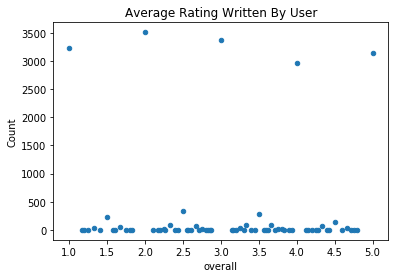

In [22]:
#Scatter plot for average rating written by user.
User_No_Rating3.plot(x="overall",y="Count",kind="scatter",title="Average Rating Written By User")
plt.show()


In [ ]:
#count of reviews by brand
bybrand=df.groupby(['brand'])['reviewerID'].count().reset_index()
#change name of column
bybrand=bybrand.rename(columns={'reviewerID': 'Number_Of_Reviews'})
bybrand=bybrand.sort_values(by='Number_Of_Reviews', ascending=False)
bybrand1=bybrand.head(10)


In [ ]:
#plot number of reviews by brand
bybrand1.plot(kind='bar', x="brand",y="Number_Of_Reviews", title="# Reviews by Brand")

import matplotlib.pyplot as plt
plt.show()



In [ ]:
df1=df[(df['brand']=='Samsung') | (df['brand']=='BLU') | (df['brand']=='LG')| (df['brand']=='Apple')| (df['brand']=='Motorola')]
#count of reviews by brand and rating
bybrandrating=df1.groupby(['brand','sentiment'])['reviewerID'].count().reset_index()
#change name of column
bybrandrating=bybrandrating.rename(columns={'reviewerID': 'Rating_Freq'})
bybrandrating=bybrandrating.sort_values(by=['brand','sentiment'])
bybrandrating['Total_Freq'] = (bybrandrating['Rating_Freq'] / bybrandrating.groupby('brand')['Rating_Freq'].transform('sum')*100).round(2)
#bybrandrating['overall'].value_counts(normalize=True) * 100
#bybrandrating['%'] = ((bybrandrating['Number_Of_Reviews'] / bybrandrating[bybrandrating['Number_Of_Reviews']].sum())*100).round(2).astype(str) + '%'
bybrandrating



In [ ]:
pivot=pd.pivot_table(bybrandrating, values='Total_Freq', index=['brand'],columns='sentiment').reset_index()
pivot.set_index('brand',inplace=True)
pivot

In [ ]:
width = 0.2

a_vals = pivot.iloc[:,0]
b_vals = pivot.iloc[:,1]

ind = np.arange(5)
ind


In [ ]:
# make the plots
fig, ax = plt.subplots()

a = ax.bar(ind, a_vals, width, color = 'r') # plot a vals
b = ax.bar(ind + width, b_vals, width, color = 'g')  # plot b vals


# add some text for labels, title and axes ticks
ax.set_ylabel('%')
ax.set_title('Sentiments')
ax.set_xticks(ind + width / 2)
#ax.set_xticklabels(('Apple', 'Samsung'))
ax.set_xticklabels(pivot.index)

ax.legend((a[0], b[0]), ('Negative', 'Positive'),loc='lower center')


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(a)
autolabel(b)


plt.show()